# Lab 4-1 KNN을 사용한 예측

## 라이브러리 import

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 준비

In [16]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 산점도

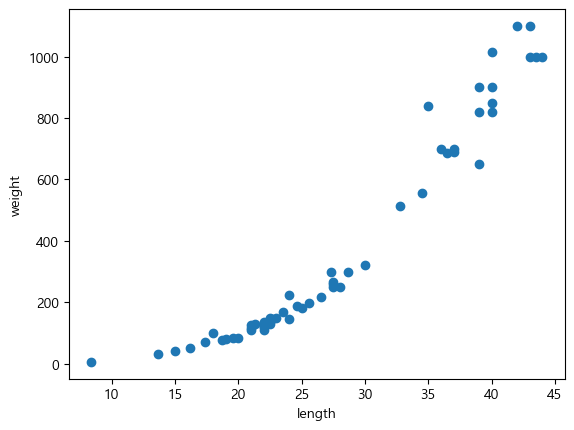

In [17]:
plt.scatter(x=perch_length, y=perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 모델생성 및 훈련

### 회귀 분석 모델 생성

In [19]:
knr = KNeighborsRegressor()

### 훈련

In [20]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

### 평가

In [21]:
knr.score(test_input, test_target)

0.992809406101064

### 예측

In [22]:
knr.predict([[50]])

array([1010.])

### 오차

In [25]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

## 훈련세트와 테스트 세트 평가

In [26]:
knr.score(train_input, train_target)

0.9698823289099254

## 예측

In [27]:
knr.predict([[15]])

array([60.])

In [31]:
knr.predict([[31]])

array([379.])

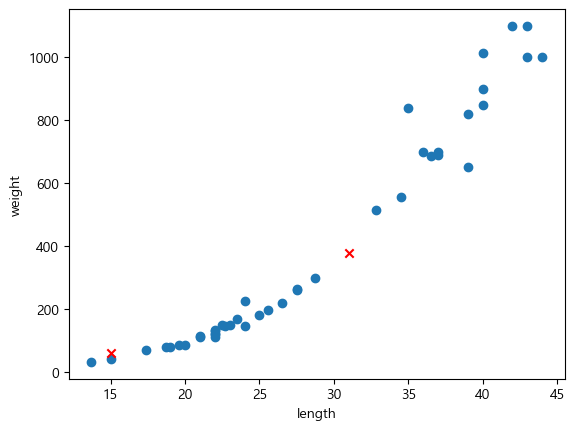

In [32]:
plt.scatter(train_input, train_target)

plt.scatter(15, 60, marker='x', color='red')
plt.scatter(31, 379, marker='x', color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## 문제점

### 큰 생선 무게 예측

In [38]:
knr.predict([[50]])

array([1010.])

## 시각화

In [37]:
distances, indexes = knr.kneighbors([[50]])

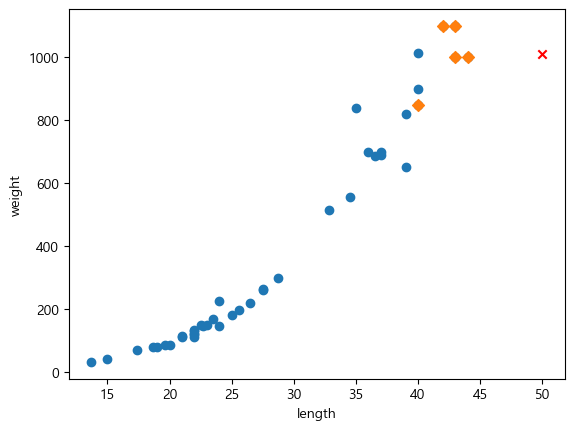

In [39]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1010, marker='x', color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [40]:
np.mean(train_target[[indexes]])

1010.0

### 길이가 100인 데이터로 예측

In [35]:
knr.predict([[100]])

array([1010.])

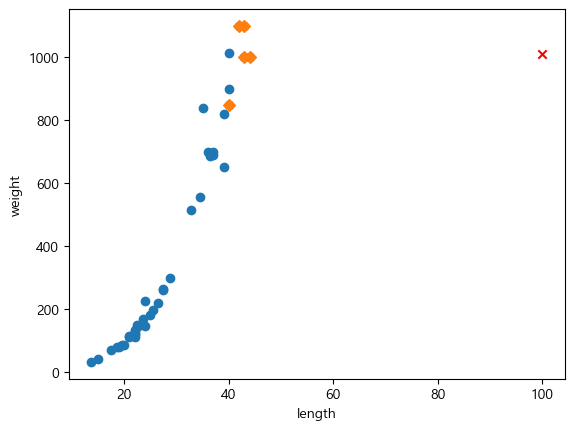

In [42]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1010, marker='x', color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()